# Введение в <br> машинное обучение



In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
from matplotlib import pyplot as plt

# Задачи машинного обучения

## Машинное обучение

**Машинное обучение (Machine Learning)** - это обширный подраздел искусственного интеллекта, изучающий методы построения алгоритмов, способных обучаться. 

Данная дисциплина находится на стыке нескольких дисциплин, таких как математическая статистика, теория оптимизации, теории вероятности, теории графов и т.д.

## Задачи

1. Обучение с учителем:
   - Классификация
   - Регрессия     
2. Обучение без учителя:
   - кластеризация     
3. Обучение с подкреплением
4. Прочие (ранжирование, уменьшение размерности и т.д.)

## Признаки

 Пусть $\mathbf{X} = \{\vec{x}_i\}_{i=1}^N$ - набор объектов, где $\vec{x}_i$ - вектор признаков
 
 - бинарные
 - категориальные
 - количественные

## Обучение с учителем

При обучении с учителем имеется набор целевых исходов $ T = \{t_i\}_{i = 1}^N $. 

**Задача:** при заданном объекте получить целевой исход.

## Классификация

* $\mathbf{X}$ - набор объектов
* $Y$ - набор меток класса
 
**Задача:** построить модель $f(\vec{x})$ на основе $\mathbf{X}$ и $Y$, такую что на основе вектора признаков  $\vec{x}$  данная модель возвращала признак класса __y__ или вектор оценок принадлежности к какому-то классу.

## Регрессия

 * $\mathbf{X}$ - набор объектов
 * $Y$ - набор значений некой величины

**Задача:** построить модель $f(\vec{x})$ на основе $\mathbf{X}$ и $Y$, такую что на основе вектора признаков $\vec{x}$ данная модель возвращала значение некой величины __y__, либо апостериорное распределение этой величины.

## Критерий качества обучения

Когда модель выдает ответ во время обучения, нам нужен критерий, который позволяет определить на сколько ошиблась наша модель. 

Этим критерием становится **функцией потерь (Loss function)**.

Самый просто вариант - это количество неправильных ответов

$$
L(f) = \sum_{n=0}^{N-1} \left[ f\left(\vec{x}_n\right) \neq {y}_n \right]
$$

Он не очень подходит для оптимизации параметров модели (отсутствует количественная оценка самой ошибки).

Одной из самых популярный функций потерь является среднеквадратичное отклонение

$$
L(f) = \sum_{n=0}^{N-1} \frac{1}{N} \left( 
    f(\vec{x}_n) - y_i\right
)^2
$$

## Основные проблемы

Одной из специфик машинного обучения является проблема переобучения модели.

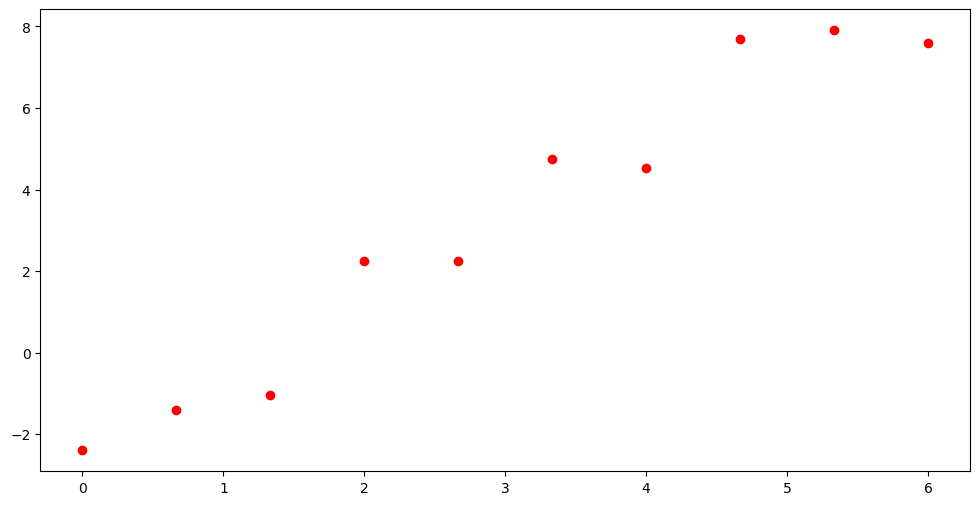

In [3]:
f = lambda x: 2 * x - 3
x = np.linspace(0, 6, 10)
y = f(x)
noise = np.random.normal(0, 1, y.shape)
yn = y + noise
plt.plot(x, yn, "ro", label="signal+noise")
plt.show()

In [4]:
z = np.polyfit(x, yn, 1)
p_lin = np.poly1d(z)
z

array([ 1.89090452, -2.46331387])

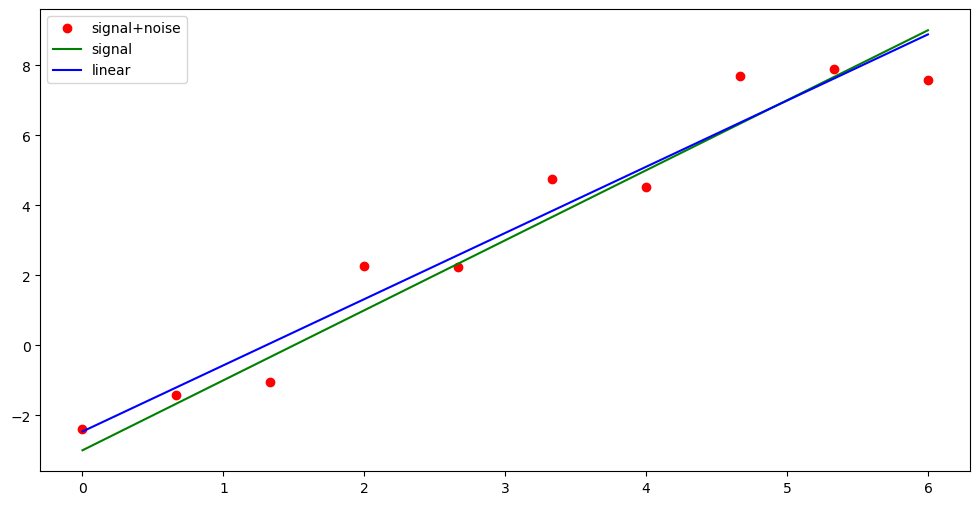

In [5]:
plt.plot(x, yn, "ro", label="signal+noise")
plt.plot(x, y, "g-", label="signal")
plt.plot(x, p_lin(x), "b-", label="linear")
plt.legend()
plt.show()

In [6]:
z = np.polyfit(x, yn, 9)
p_9 = np.poly1d(z)
z

array([ 3.86600860e-02, -1.04365059e+00,  1.18500835e+01, -7.35394733e+01,
        2.71048346e+02, -6.02368032e+02,  7.78801096e+02, -5.25862988e+02,
        1.39563414e+02, -2.39350172e+00])

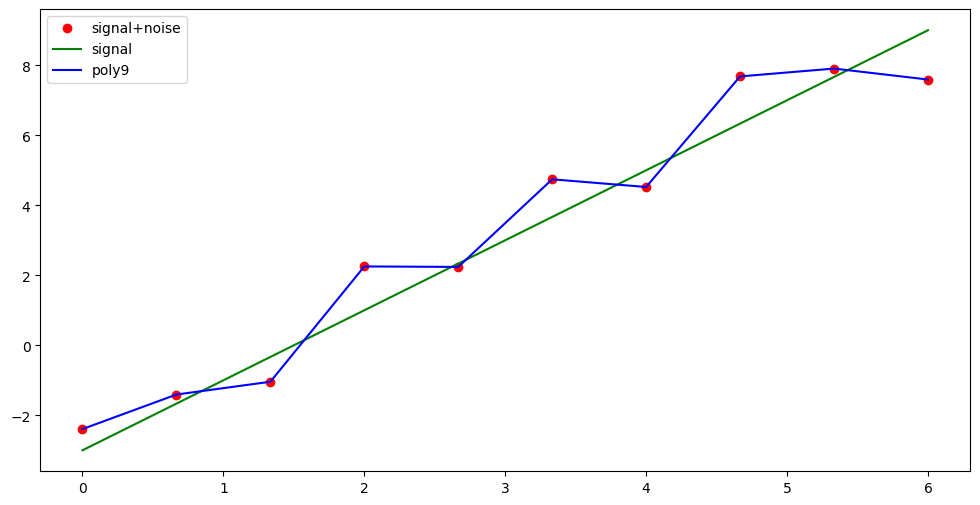

In [7]:
plt.plot(x, yn, "ro", label="signal+noise")
plt.plot(x, y, "g-", label="signal")
plt.plot(x, p_9(x), "b-", label="poly9")
plt.legend()
plt.show()

In [8]:
f(10), p_lin(10), p_9(10)

(17, 16.445731362913833, 1065150.7168984152)

## Обучение без учителя

Задается только набор объектов.

**Зачада:** разбиение данных на кластеры или определение нового набора признаков (с меньшим их количеством)

## Кластеризация

  * $\mathbf{X}$ - набор объектов
 
**Задача:** построить модель $f(\vec{x})$, такую что разобъет набор объектов $\mathbf{X}$ на непересекающиеся кластеры. При этом в каждом кластере будут находится, в некотором роде похожие друг на друга объекты.

In [9]:
x = [
    60, 60,
    62, 62, 62,
    63,
    64,
    65, 65,
    68, 
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    76.5,
    77.5,
    79.5,
    80.5,
    82, 82
]

y = [
    155, 160,
    155, 160, 165,
    170,
    165,
    167, 162,
    165, 
    170,
    168,
    170,
    175,
    170,
    175,
    160,
    168,
    169,
    170,
    180,
    180.5,
    180, 185
]

def plot1(x, y):
    plt.figure(figsize=(12, 6))
    plt.plot(x[:9], y[:9], "o")
    plt.plot(x[9:16], y[9:16], "o")
    plt.plot(x[16:20], y[16:20], "o")
    plt.plot(x[20:], y[20:], "o")
    plt.show()
    
def plot2(x, y):
    plt.figure(figsize=(6, 6))
    plt.plot(x[:16], y[:16], "o")
    plt.plot(x[16:20], y[16:20], "o")
    plt.plot(x[20:], y[20:], "o")
    plt.show()

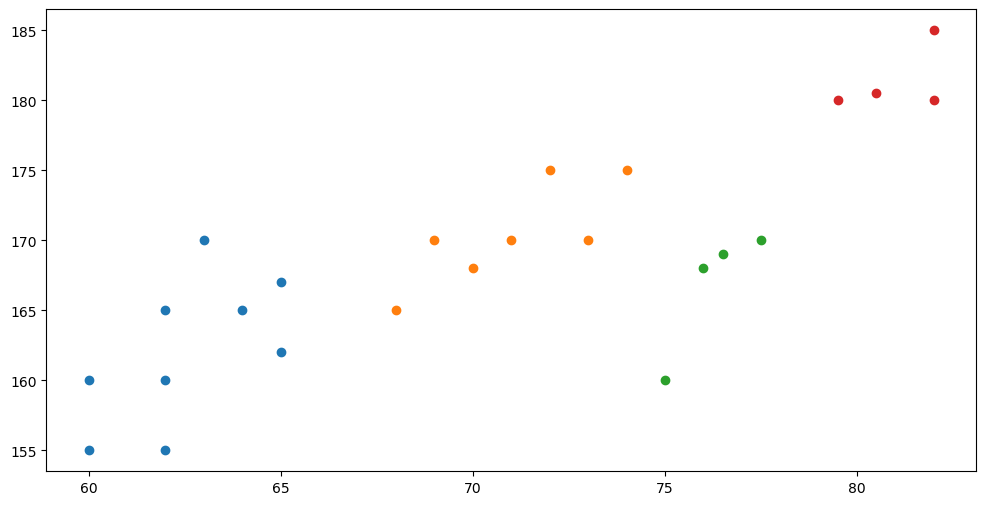

In [10]:
plot1(x, y)

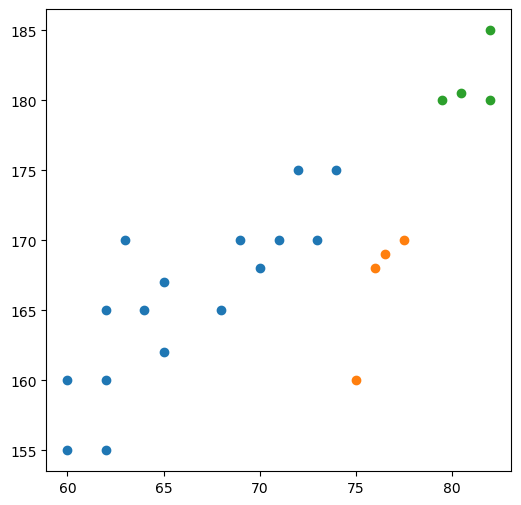

In [11]:
plot2(x, y)

# Инструменты

* Python 3.6+ (через [Docker](https://www.docker.com/) или [Anaconda](https://www.anaconda.com/))
* NumPy, Pandas, Matplotlib, scikit learn, Tensorflow
* Jupyter
* Git

## NumPy

Сам по себе Python является довольно медленным языком, но благодаря своей архитектуре он может подключать к себе внешние высокоэффективные библиотки. Одной из таких библиотек является **NumPy**.

[Tutorial](https://numpy.org/doc/stable/user/quickstart.html)

**NumPy** работает с тензорами и предоставляет практически все доступные операции над ними.

In [12]:
import numpy as np

# создавать массивы можно и структур Python
a = np.array([1, 2, 3, 4])
print(a, a.dtype, a.shape)

[1 2 3 4] int32 (4,)


In [13]:
# Можем изменить форму, -1 можно использовать 
# для автоматического определения размерности оси
a.reshape((2, -1))

array([[1, 2],
       [3, 4]])

In [14]:
# можно указать даже конкретный тип данных
a_complex = np.array([[1, 1], [2, 2], [3, 3]], dtype=np.complex128)

In [ ]:
# пустой тензор с мусором
empty = np.empty( (2, 3) )
# тензор с нулями
zeros = np.zeros( (3, 5) )
# тензор с единицами
ones = np.ones( (2, 5) )
# диагональная матрица
eye = np.eye( 2, 3, 1 )
# единичная матрица
identity = np.identity( 3 )

In [11]:
# равномерное заполнение в интервале
a = np.linspace(0, 10, 5)
print(a)
# заполнение с шагом
a = np.arange(0, 10, 2)
print(a)

[ 0.   2.5  5.   7.5 10. ]
[0 2 4 6 8]


In [6]:
# Удобные арифметические операции
print(a)
np.sin(a + 1)

[0.  2.5 5.  7.5]


array([ 0.84147098, -0.35078323, -0.2794155 ,  0.79848711])

In [92]:
# Можно складывать с другими векторами
b = np.ones(a.shape)
a + b

array([1. , 3.5, 6. , 8.5])

In [7]:
# Расширенная идексация и взятие срезов

# случайная матрица
matrix = np.random.normal(size=(3,3))
matrix

array([[-0.37316681,  0.35231298, -0.91348987],
       [-1.08499978, -1.9904055 , -1.09670666],
       [-1.18986159,  1.08020761,  1.15819324]])

In [91]:
# получить конкретный элемент
matrix[0,1] 

0.8406884731750003

In [10]:
# получить строку
print(matrix[1,:])

# получить столбец
print(matrix[:,1])

# занулить столбец 
# (да, срезам можно присваивать значения)
matrix[:, 1] = 0
print(matrix)

[ 0.          0.         -1.09670666]
[0. 0. 0.]
[[ 0.          0.         -0.91348987]
 [ 0.          0.         -1.09670666]
 [-1.18986159  0.          1.15819324]]


array([1.15819324])

In [34]:
# добавить вектор (вектор автоматически размножается вдоль оси)
matrix + np.ones(3)

array([[-1.0338548 ,  1.        ,  0.16361127],
       [ 1.99563317,  1.        , -0.87698677],
       [ 1.69228901,  1.        ,  0.49694329]])

In [36]:
matrix = np.random.normal(size=(3,3))
matrix_1 = np.linalg.inv(matrix)

#Два вида умножения матриц
print(np.matmul(matrix, matrix_1))
print(matrix @ matrix_1)

[[ 1.00000000e+00  4.39437077e-17 -1.03752997e-16]
 [-2.14624472e-17  1.00000000e+00  3.80908417e-17]
 [ 1.64077236e-17  6.85546753e-17  1.00000000e+00]]
[[ 1.00000000e+00  4.39437077e-17 -1.03752997e-16]
 [-2.14624472e-17  1.00000000e+00  3.80908417e-17]
 [ 1.64077236e-17  6.85546753e-17  1.00000000e+00]]


## Matplotlib

Мощная библиотека для построения графиков практически любой сложности. Огромное число примеров с иcходными кодом можно посмотреть на официальном сайте 

https://matplotlib.org/examples/

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

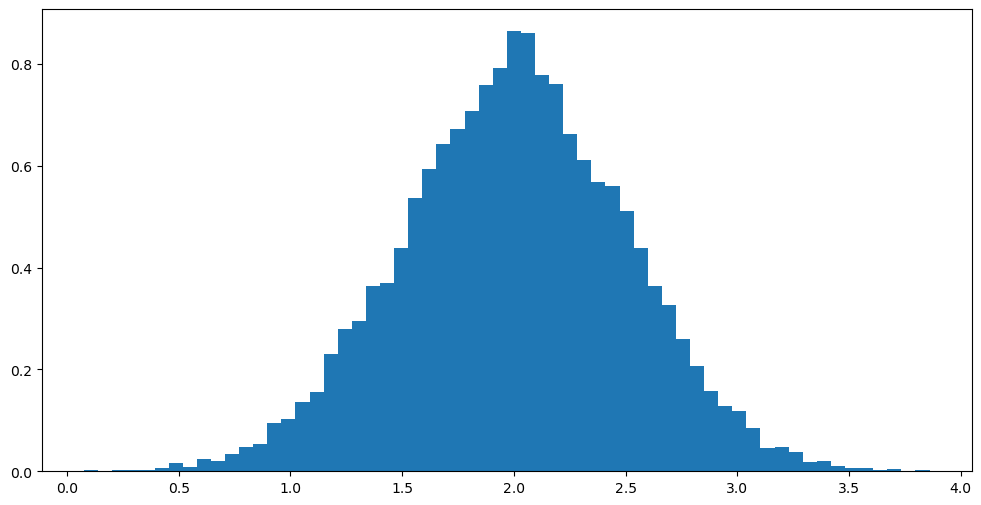

In [16]:
v = np.random.normal(2, 0.5, 10000)
plt.hist(v, bins=60, density=True)
plt.show()

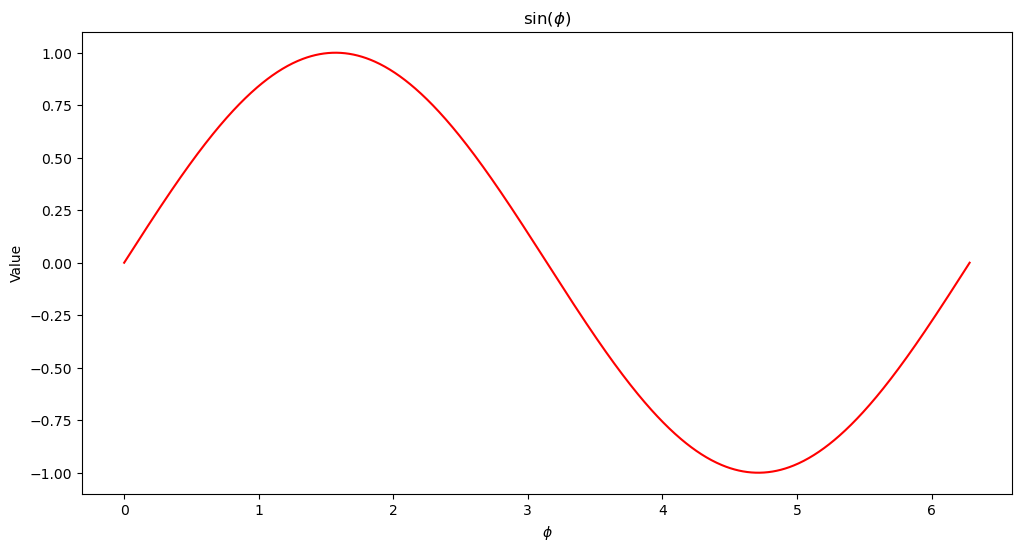

In [17]:
x = np.linspace(0, 2.0 * np.pi, 1000)
y = np.sin(x)
plt.figure()
plt.title("$\sin(\phi)$")
plt.xlabel("$\phi$"); plt.ylabel("Value")
plt.plot(x, y, 'r-')
plt.show()

## Pandas

Библиотека для обработки и анализа данных. Предоставляет множество различных операций над числовыми таблицами и рядами.


[Tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", index_col='id')
df = df.dropna(subset=['smoke', 'alco', 'active'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Dataframe

In [3]:
df.shape

(70000, 12)

In [4]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.index

Index([    0,     1,     2,     3,     4,     8,     9,    12,    13,    14,
       ...
       99986, 99988, 99990, 99991, 99992, 99993, 99995, 99996, 99998, 99999],
      dtype='int64', name='id', length=70000)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Просмотр данных

Pandas предоставляет самые различные способы получения информации о хранящихся данных внутри Dataframe. Рассмотрим некотрые из них.

In [28]:
# Краткий вывод первых строк
df.head(2) # same df[:2]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [33]:
# Краткий вывод последних строк
df.tail(2) # same df[-2:]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [97]:
# Срезы строк (отличется от numpy!)
df[0:5:2]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# Выбор столбцов
new_df = df[['age', 'weight']]
df[['age', 'weight']].head(3)

,age,weight
id,,
0,18393,62.0
1,20228,85.0
2,18857,64.0


In [9]:
(df['gender'] == 1).head(4)

id
0    False
1     True
2     True
3    False
Name: gender, dtype: bool

In [10]:
df[(df['gender'] == 1) & (df['gluc'] == 1)].head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
df.sort_values(by='age', ascending=True).head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
81643,23713,2,175,75.0,120,80,1,1,0,0,1,1
97124,23701,1,178,75.0,120,80,1,1,0,0,1,1
72373,23692,2,167,68.0,120,80,2,2,0,0,0,1


In [13]:
df.sort_values(by=['age', 'weight'], ascending=[True, False]).head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
31922,10798,2,175,92.0,100,60,1,1,0,0,1,0
43842,10859,1,159,59.0,120,80,1,1,0,0,1,0
8850,10878,1,175,59.0,120,80,1,1,0,0,1,0


In [14]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [15]:
df['gender'].value_counts(normalize=True)

gender
1    0.650429
2    0.349571
Name: proportion, dtype: float64

In [16]:
df['age'].mean()

19468.865814285713

In [17]:
df[(df['gender'] == 1) & (df['cardio'] == 1)]['age'].mean()

20133.167536257515

In [18]:
df['age'].min(), df['age'].max()

(10798, 23713)

In [19]:
# Индексация по имени
df.loc[0:4, 'age':'weight']

,age,gender,height,weight
id,,,,
0,18393,2,168,62.0
1,20228,1,156,85.0
2,18857,1,165,64.0
3,17623,2,169,82.0
4,17474,1,156,56.0


In [37]:
# Индексация по номеру
df.iloc[0:4, 1:5]

,gender,height,weight,ap_hi
id,,,,
0,2,168,62.0,110
1,1,156,85.0,140
2,1,165,64.0,130
3,2,169,82.0,150


## Манипуляции с данными

В Pandas достаточно удобно производить различные операции над табличными данными.

In [20]:
(df['gender'] * 4).head(3)

id
0    8
1    4
2    4
Name: gender, dtype: int64

In [38]:
# Применение функции к столбцам

df.apply(np.max)

age            23713.0
gender             2.0
height           250.0
weight           200.0
ap_hi          16020.0
ap_lo          11000.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

In [39]:
# Применение функции к каждой строке

df[:5].apply(np.max, axis=1)

id
0    18393.0
1    20228.0
2    18857.0
3    17623.0
4    17474.0
dtype: float64

In [40]:
df[df['height'].apply(lambda h: h % 5 == 0)].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
18,14791,2,165,60.0,120,80,1,1,0,0,0,0
25,21296,1,170,75.0,130,70,1,1,0,0,0,0
35,16608,1,170,68.0,150,90,3,1,0,0,1,1
42,18291,1,155,105.0,120,80,3,1,0,0,1,1


In [24]:
df['cardio_t'] = df['cardio'].map(
    {1: "Yes", 0: "No"}
)
df[['cardio', 'cardio_t']].head()

,cardio,cardio_t
id,,
0,0,No
1,1,Yes
2,1,Yes
3,1,Yes
4,0,No


## Группировка данных

Группировка данных, позволяет разбить данные на подгруппы, к которым можно применять агрегирующие функции.

В общем случае группировка использует следующий синтаксис

```python
df.groupby(by=grouping_columns)[columns].function()
```

In [29]:
df.groupby(['gender'])['age', 'weight'].describe(percentiles=[])

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [22]:
df.groupby(['gender'])['age', 'weight'].agg([
    np.mean, np.std, np.min, np.max,
])

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [30]:
pd.crosstab(df['gender'], df['cholesterol'], margins=True)

cholesterol,1,2,3,All
gender,,,,
1,33570,6403,5557,45530
2,18815,3146,2509,24470
All,52385,9549,8066,70000


## Сводная таблица

In [33]:
df.pivot_table(['age', 'height', 'weight'],
               ['cholesterol', 'cardio'], aggfunc=[np.mean, np.std])

mean                                 std  \
                             age      height     weight          age   
cholesterol cardio                                                     
1           0       18758.587112  164.608762  71.024961  2474.475240   
            1       19950.845110  164.566775  75.634979  2332.054127   
2           0       19192.916031  163.528823  73.729008  2400.394676   
            1       19877.055826  164.112696  78.607228  2375.797086   
3           0       20163.898520  163.801797  76.094133  2174.824489   
            1       20619.931649  163.310172  79.594040  2105.833344   

                                         
                      height     weight  
cholesterol cardio                       
1           0       8.145485  12.836796  
            1       8.210847  14.402016  
2           0       8.105521  15.032948  
            1       8.380279  15.599365  
3           0       8.139603  15.307399  
            1       8.311459  15.842005

## Манипуляции со столбцами

Удалять и добавлять столбцы в Pandas весьма просто

In [34]:
health_index = df['weight'] / (df['height']/100)**2
df['health_index'] = health_index
df.pivot_table(['health_index'], ['cardio'])

,health_index
cardio,
0,26.548175
1,28.566061


In [35]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'cardio_t',
       'health_index'],
      dtype='object')

In [36]:
df.drop(['cardio_t'], axis=1, inplace=True)

In [37]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'health_index'],
      dtype='object')

In [38]:
df.drop([0, 1, 2]).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,health_index
id,,,,,,,,,,,,,
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.384676
9,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.729725
12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.983588


## Визуализация данных

Самым первым шагом при анализе данных является визуализация данных. Это помогает обнаруживать внутренние зависимости признаков, либо же помогает в выборе дальнейших способов анализа данных.

## Pandas Plotting

Pandas помимо манипуляций с данными, позволяет их также визуализировать.

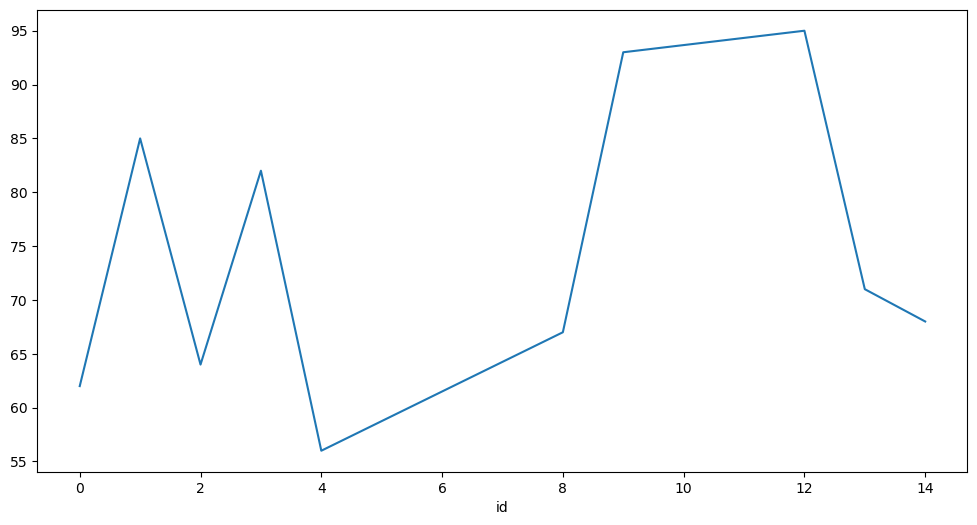

In [39]:
df["weight"][:10].plot();

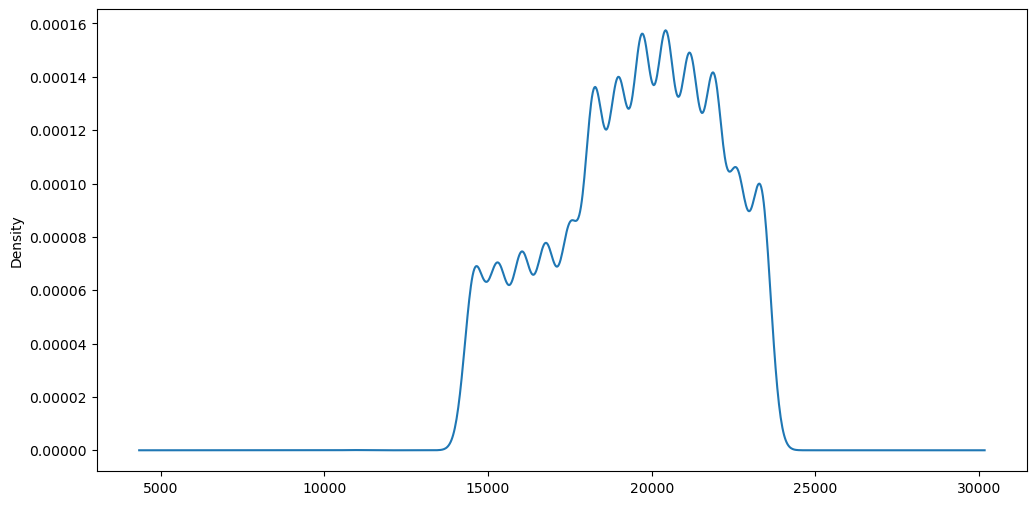

In [40]:
df['age'].plot(kind='density');

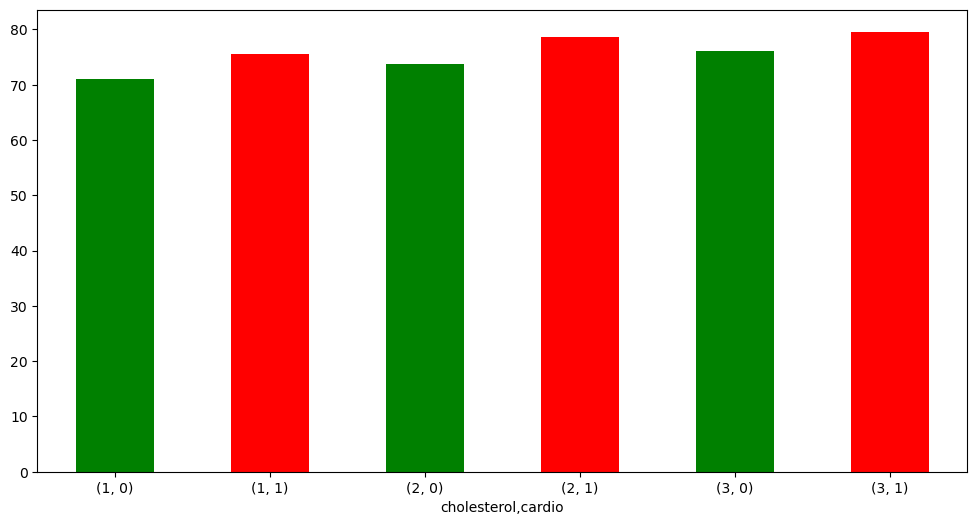

In [41]:
df.groupby(['cholesterol', 'cardio'])['weight']\
    .mean()\
    .plot(kind='bar', rot=0, color=['g', 'r','g', 'r','g', 'r',]); 

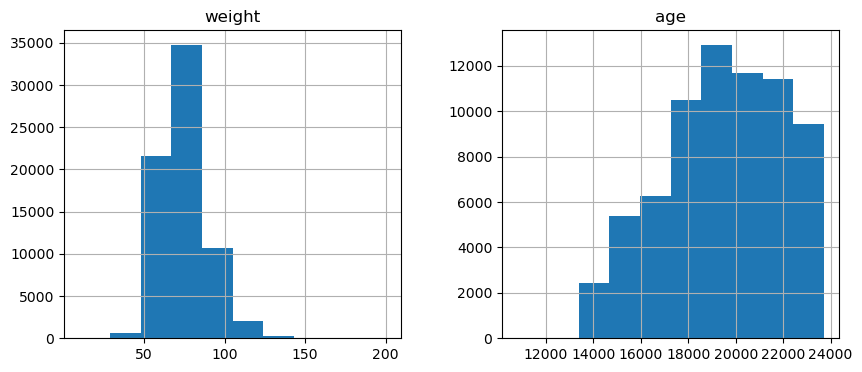

In [42]:
df[['weight', 'age']].hist(figsize=(10, 4));

## Seaborn

In [43]:
%matplotlib inline
import seaborn as sns

## Distplot

Данный график показывает распределение заданной величины.

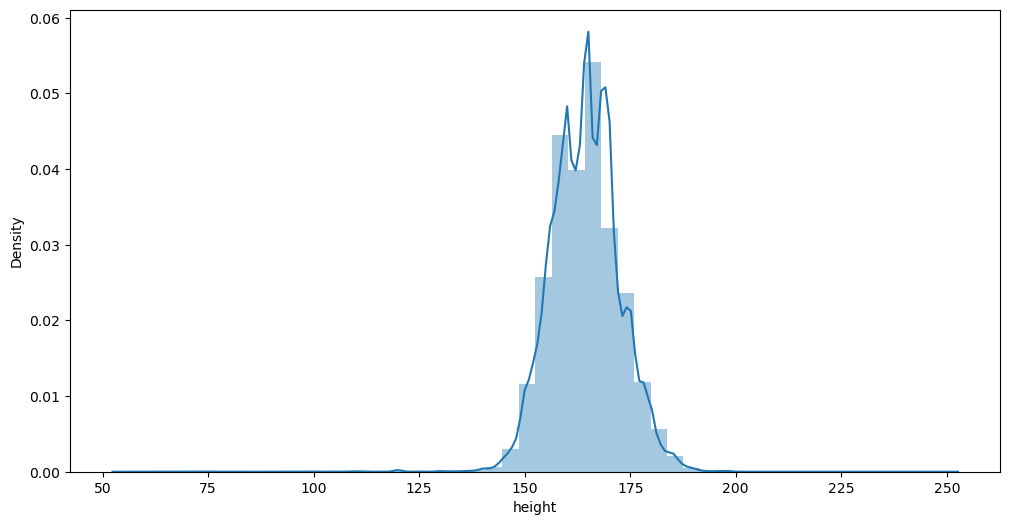

In [44]:
sns.distplot(df['height']);

## Boxplot

Данный график компактно отображает одномерное распределение вероятностей. Центр ящика - это медиана распределения, границы ящика - квартили 25% и 75%. Усы $X1 = Q_1 - 1.5 (Q_3 - Q_1)$ и $X2 = Q_3 + 1.5 (Q_3 - Q_1)$. Выбросы обозначаются точками.

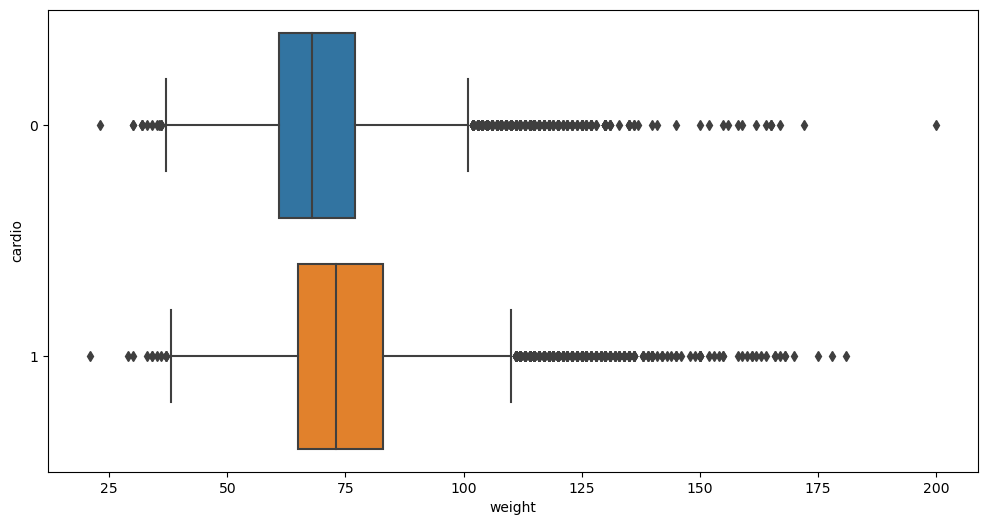

In [45]:
sns.boxplot(y="cardio", x="weight", 
            data=df[df['gender'] == 1], orient="h");

## Countplot

На данной графике просто указывается количество записей, удовлетворящих определенному критерию.

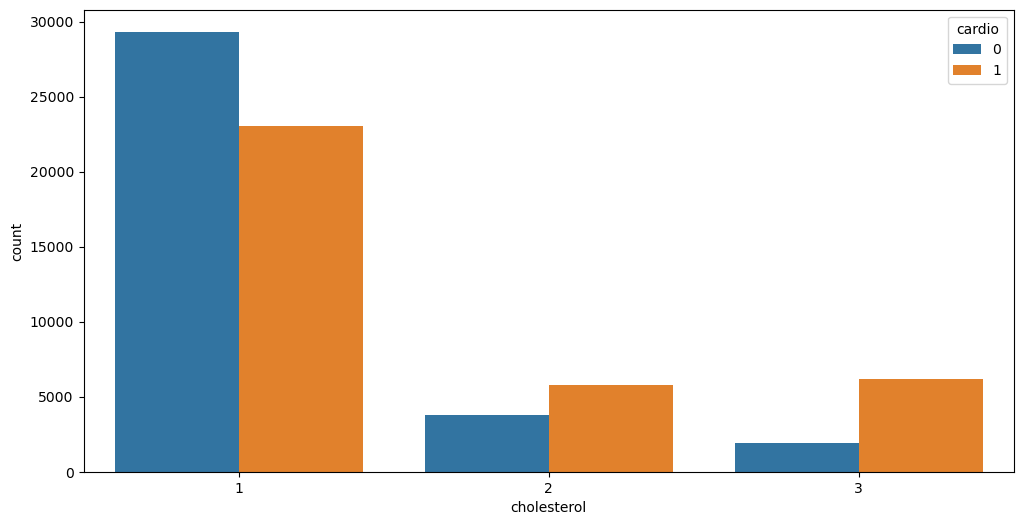

In [46]:
sns.countplot(x='cholesterol', hue='cardio', data=df);

## Pairplot

Строит зависимости между величинами.

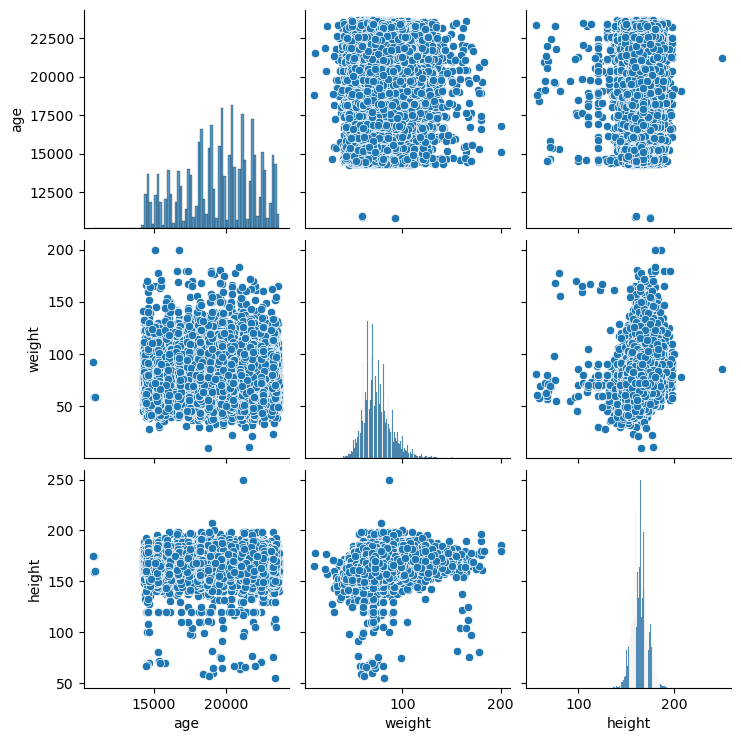

In [47]:
sns.pairplot(df[['age', 'weight', 'height']]);

## jointplot

Позволяет более детально рассмотреть зависимости между двумя величинами.

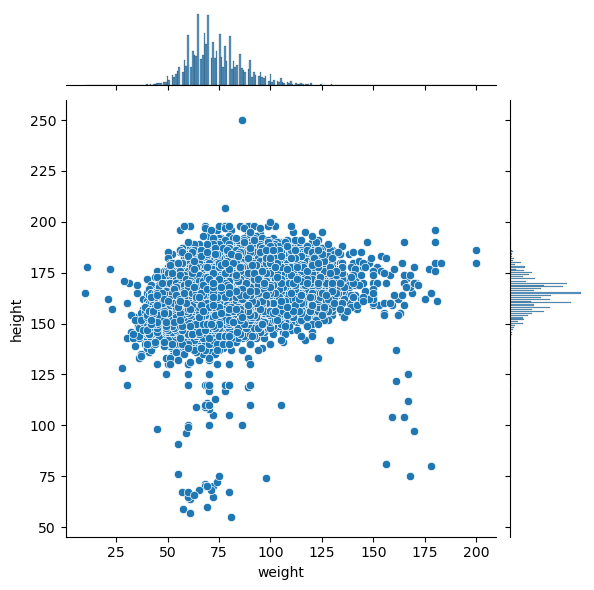

In [48]:
sns.jointplot(x='weight', y='height', 
              data=df, kind='scatter');

## Heatmap

Визуализация 2D-поверхности.

<Axes: >

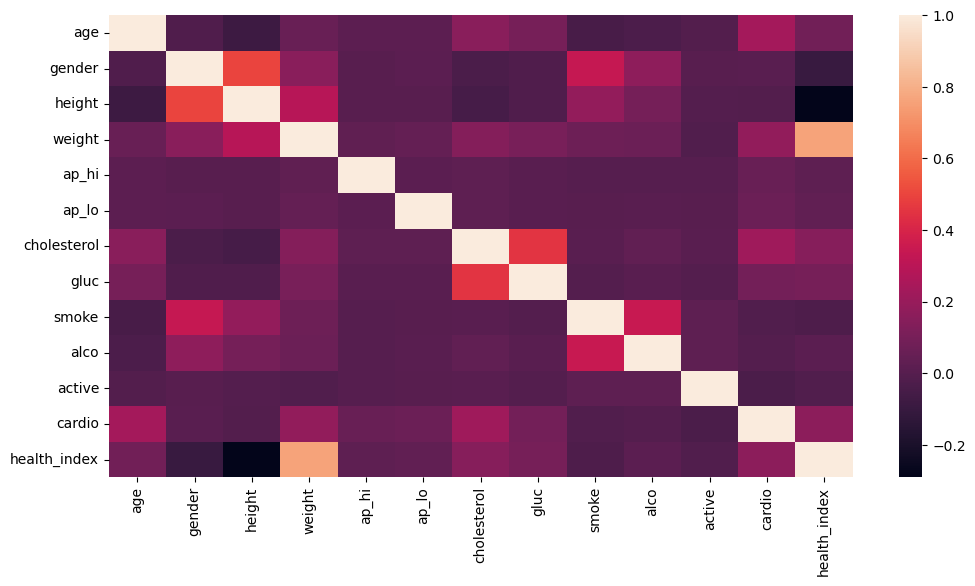

In [49]:
cm = df.corr()
sns.heatmap(cm)

## Plotly

Библиотека для создания интерактивных графиков. В графиках, созданных данной библиотекой, доступен достаточно удобный интерфейс взаимодействия с пользователем.

In [50]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [51]:
hist = go.Histogram(x=df['height'], xbins=dict(size=8))
layout = go.Layout(title="Height")
fig = go.Figure(data=[hist], layout=layout)
py.iplot(fig)